# Wrangle and Analyze

In that project task we have to collect data from twitter website, In order to get data from the twitter we need to get Twitter API, therefore we can access data from the twitter website. In the real world data is messy, dirty and untidy, our task is to clean messy data, tidy data make easily visualization in all aspects.

In that project we are using **WeRateDog**s data. In that dataset, we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

# **Datasets summary**

In the **tweet_enhance** table we have information about the users who tweet, retweet about their dogs, urls, data and time when they tweet, expande_urls have photos or videos. In the source page there is information about download app, vine info(On Vine you’ll be able to find public profiles. These profiles may include: Vine username), Twitter web client, and Twitter products means what happening and what people are talking about. Rating denominator(10) from the weratedogs specified for 10 and numerator which is greater than 10.Humorous text info with ratings of dogs and profiles of users. Status_id, user_id, tweet_status, retweet_user_id, there are four columns belong to dogs' stages.

In the **json_df** table, there are 2331 rows and 3 columns which are tweet_id, retweet_count and favorite_count.

In the **image_prediction** table we have information about 

p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
p1_conf is how confident the algorithm is in its #1 prediction → 95%
p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
p2 is the algorithm's second most likely prediction → Labrador retriever
p2_conf is how confident the algorithm is in its #2 prediction → 1%
p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import os
import re
import requests
import tweepy
import datetime
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
from PIL import Image
from io import BytesIO
from timeit import default_timer as timer
import json
from IPython.display import IFrame

# Access and Gathering Data
For this project we gather data from three different sources.
Twitter_archive data is download from the locally from the drive. We use pandas read function to access that data for the project.

For tweet_api data, downloaded from the twitter website with the use of  Tweet API keys. Write down queries to extract data with tweet_id, that tweet_id, we got from the tweet_archive data, we fetch data, using tweet_id instead of website or user name.

Request library is used for the image prediction data, we used url to fetch data from the website.

In [3]:
tweet_enhance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/udacity_projects/twitter-archive-enhanced.csv')
tweet_enhance.head()

tweet_id  in_reply_to_status_id  ...  pupper puppo
0  892420643555336193                    NaN  ...    None  None
1  892177421306343426                    NaN  ...    None  None
2  891815181378084864                    NaN  ...    None  None
3  891689557279858688                    NaN  ...    None  None
4  891327558926688256                    NaN  ...    None  None

[5 rows x 17 columns]

In [4]:
# folder_name = 'image-predictions'
# if not os.path.exists(folder_name):
#    os.makedirs(folder_name)

# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)
# with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb')as file:
#   file.write(response.content)
# os.listdir(folder_name)


In [5]:
image_prediction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/udacity_projects/image-predictions.tsv', delimiter = '\t', encoding = 'utf-8')
image_prediction.head()

tweet_id  ... p3_dog
0  666020888022790149  ...   True
1  666029285002620928  ...   True
2  666033412701032449  ...   True
3  666044226329800704  ...   True
4  666049248165822465  ...   True

[5 rows x 12 columns]

In [6]:
image_prediction.jpg_url.duplicated().sum()

66

In [7]:
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''


# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

In [8]:
#Extract tweet_ids from twitter archive and make a list
# api = tweepy.API(auth_handler=auth, 
#                  parser=tweepy.parsers.JSONParser(),
#                  wait_on_rate_limit=True, 
#                  wait_on_rate_limit_notify=True)
# # use a timer to indicate when the query of all of the tweet_id's is complete & how long it takes
# from timeit import default_timer as timer
# start = timer()
# df_list = []
# tweet_errors = []
# tweet_id_list = tweet_enhance['tweet_id'].tolist()
# for tweet_id in tweet_id_list:
#     try:
#         tweet = api.get_status(tweet_id, tweet_mode='extended')
#         favorite = tweet['favorite_count']
#         retweet = tweet['retweet_count']
#         df_list.append({'tweet_id': int(tweet_id), 
#                         'favorite_count': int(favorite), 
#                         'retweets': int(retweet)})
                      
#     except Exception as e:
#         tweet_errors.append(tweet_id)
#         print(str(tweet_id) + "_" + str(e))
                
# end = timer()
# print(end - start)

In [9]:
# import json
# with open('df_list.txt','w') as outfile:
#     json.dump(df_list, outfile)       


In [10]:
# data = None
# with open('df_list.txt') as _file:
#   data = json.loads(_file.read())
# tweet_api = pd.DataFrame.from_records(data)
# tweet_api.head()

In [11]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# **Assess**

**Quality issu**e:

tweet_enhace table

tweet_id is int, should be str.

colmun, "name" has value 'a' that could be a name but in the data in the data doesn't seem like consitent with 'a', we also have 745 none values, and lowercase and uppercase,name column is not consistent.

missing values in these columns: in_reply_to_status_id, in_reply_user_id,retweet_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_url and null vlaues.

in_reply_to_user_id 47 duplicate values
in_reply_to_status_id 2 duplicate values



Timestamp column, remove +0000, and convert object to datetime. years are in mix format, means 2016, 2014, 2015...so on, same as retweeted_status_timestamp column

expanded_urls column is not consistent. few urls are all join with one another with comma, these joined columns are duplicated

rating_numerotor column 2 vlaues are '0' and rating_denomenetor one value is '0'. denominator is not consistent, some values are different than 10. same as numerator, some of numerator are with higher values.

Invalid/incomplete urls in expanded_urls column and 129 duplicate values.

image_prediction table:

jpg_url is not consistent, two urls with id numbers and 66 urls are duplicated
p1, p2 and p3 column contains '_','-' upper and lowercase with dog names, they are not in the sequence.
p1, p2, p3 contains unusal names.
tweet_id is int, that should be str.




**Tidy:**

tweet_enhance_table:

Text column, text, ratings and url altogether, need to extract in individual columns.

source column, url and text together, 'Twitter for iPhone', 'Make a scene',
'Web client', 'TweetDeck'


image_prediction table

doggo, floffer, poppo, pupp shoud be in the dog_status columns,
text should be three columns such that, url, dog_name and ratings








In [12]:
json_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/udacity_projects/df_list.txt', orient = 'records' )
json_df.head()

tweet_id  favorite_count  retweets
0  892420643555336193           35055      7372
1  892177421306343426           30357      5494
2  891815181378084864           22816      3631
3  891689557279858688           38335      7549
4  891327558926688256           36610      8136

In [13]:
json_df.shape

(2331, 3)

In [14]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweets        2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [15]:
json_df.describe()

tweet_id  favorite_count      retweets
count  2.331000e+03     2331.000000   2331.000000
mean   7.419079e+17     7321.976834   2592.428571
std    6.823170e+16    11371.679313   4385.142776
min    6.660209e+17        0.000000      1.000000
25%    6.782670e+17     1270.500000    525.500000
50%    7.182469e+17     3177.000000   1209.000000
75%    7.986692e+17     8950.000000   3002.000000
max    8.924206e+17   150760.000000  74403.000000

In [16]:
#in the faorite_count column we have lots of 0 values
json_df[json_df['favorite_count'].duplicated()]

tweet_id  favorite_count  retweets
35    885311592912609280               0     16172
67    879130579576475649               0      5986
72    878404777348136964               0      1119
73    878316110768087041               0      5810
77    877611172832227328               0        71
...                  ...             ...       ...
2308  666337882303524864             174        81
2309  666293911632134144             449       306
2316  666094000022159362             152        66
2323  666055525042405380             397       211
2326  666049248165822465              94        38

[327 rows x 3 columns]

In [17]:
json_df[json_df['retweets'].duplicated()]

tweet_id  favorite_count  retweets
74    878281511006478336            7038      1119
75    878057613040115712           38418      5986
96    873213775632977920            6556      1397
109   870726314365509632             112         3
121   868552278524837888            9289      1838
...                  ...             ...       ...
2325  666050758794694657             119        51
2326  666049248165822465              94        38
2327  666044226329800704             259       122
2328  666033412701032449             107        39
2329  666029285002620928             118        41

[655 rows x 3 columns]

In [18]:

#information about the tweet_enhance data
tweet_enhance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
#inspecting data with sample so I can see how values are distributed in the dataset.
tweet_enhance.sample(50)

tweet_id  in_reply_to_status_id  ...  pupper  puppo
649   792913359805018113                    NaN  ...    None   None
23    887473957103951883                    NaN  ...    None   None
2095  670764103623966721                    NaN  ...    None   None
440   819924195358416896                    NaN  ...    None   None
1836  676098748976615425                    NaN  ...    None   None
1574  687480748861947905                    NaN  ...    None   None
2258  667724302356258817                    NaN  ...    None   None
598   798686750113755136                    NaN  ...    None   None
1980  672975131468300288                    NaN  ...  pupper   None
1563  688179443353796608                    NaN  ...  pupper   None
663   790946055508652032                    NaN  ...    None  puppo
1365  702684942141153280                    NaN  ...    None   None
2031  671768281401958400                    NaN  ...    None   None
1412  698953797952008193                    NaN  ...    None   None
2042  671538301157904385                    NaN  ...    None   None
880   760539183865880579                    NaN  ...    None   None
2027  671874878652489728                    NaN  ...    None   None
2140  670003130994700288                    NaN  ...    None   None
2252  667801013445750784                    NaN  ...    None   None
1812  676811746707918848                    NaN  ...    None   None
1447  696488710901260288                    NaN  ...    None   None
918   756651752796094464                    NaN  ...    None   None
481   815639385530101762                    NaN  ...    None   None
286   838831947270979586                    NaN  ...    None   None
556   803638050916102144                    NaN  ...  pupper   None
1420  698262614669991936                    NaN  ...    None   None
1147  726935089318363137                    NaN  ...    None   None
1291  708119489313951744                    NaN  ...    None   None
2235  668171859951755264                    NaN  ...    None   None
1782  677687604918272002                    NaN  ...    None   None
159   860981674716409858                    NaN  ...    None   None
541   806242860592926720                    NaN  ...    None   None
1866  675349384339542016           6.749998e+17  ...    None   None
678   789268448748703744                    NaN  ...    None   None
1873  675145476954566656                    NaN  ...    None   None
1982  672968025906282496                    NaN  ...    None   None
184   856526610513747968           8.558181e+17  ...    None   None
2281  667369227918143488                    NaN  ...    None   None
2174  669216679721873412                    NaN  ...    None   None
1114  732732193018155009                    NaN  ...    None   None
190   855857698524602368                    NaN  ...    None   None
2049  671504605491109889                    NaN  ...    None   None
1196  717047459982213120                    NaN  ...    None   None
573   801167903437357056                    NaN  ...    None   None
585   800018252395122689                    NaN  ...    None   None
268   841439858740625411                    NaN  ...    None   None
906   758041019896193024                    NaN  ...    None   None
1345  704491224099647488           7.044857e+17  ...    None   None
665   790698755171364864                    NaN  ...    None   None
1755  678774928607469569                    NaN  ...    None   None

[50 rows x 17 columns]

In [20]:
tweet_enhance['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [21]:
#columns in_reply_to_status_id,	in_reply_to_user_id, both of them seems like same, need to investigate more about these columns.
tweet_enhance.in_reply_to_status_id.value_counts(), tweet_enhance.in_reply_to_user_id.value_counts()

(6.671522e+17    2
 8.562860e+17    1
 8.131273e+17    1
 6.754971e+17    1
 6.827884e+17    1
                ..
 8.482121e+17    1
 6.715449e+17    1
 6.936422e+17    1
 6.849598e+17    1
 7.331095e+17    1
 Name: in_reply_to_status_id, Length: 77, dtype: int64, 4.196984e+09    47
 2.195506e+07     2
 7.305050e+17     1
 2.916630e+07     1
 3.105441e+09     1
 2.918590e+08     1
 2.792810e+08     1
 2.319108e+09     1
 1.806710e+08     1
 3.058208e+07     1
 2.625958e+07     1
 1.943518e+08     1
 3.589728e+08     1
 8.405479e+17     1
 2.894131e+09     1
 2.143566e+07     1
 2.281182e+09     1
 1.648776e+07     1
 4.717297e+09     1
 2.878549e+07     1
 1.582854e+09     1
 4.670367e+08     1
 4.738443e+07     1
 1.361572e+07     1
 1.584641e+07     1
 2.068372e+07     1
 1.637468e+07     1
 1.185634e+07     1
 1.198989e+09     1
 1.132119e+08     1
 7.759620e+07     1
 Name: in_reply_to_user_id, dtype: int64)

In [22]:
tweet_enhance.retweeted_status_id.value_counts(), tweet_enhance.retweeted_status_user_id.value_counts()

(7.757333e+17    1
 7.507196e+17    1
 6.742918e+17    1
 6.833919e+17    1
 8.269587e+17    1
                ..
 7.848260e+17    1
 7.806013e+17    1
 8.305833e+17    1
 7.047611e+17    1
 7.331095e+17    1
 Name: retweeted_status_id, Length: 181, dtype: int64, 4.196984e+09    156
 4.296832e+09      2
 5.870972e+07      1
 6.669901e+07      1
 4.119842e+07      1
 7.475543e+17      1
 7.832140e+05      1
 7.266347e+08      1
 4.871977e+08      1
 5.970642e+08      1
 4.466750e+07      1
 1.228326e+09      1
 7.992370e+07      1
 2.488557e+07      1
 7.874618e+17      1
 3.638908e+08      1
 5.128045e+08      1
 8.117408e+08      1
 1.732729e+09      1
 1.960740e+07      1
 1.547674e+08      1
 3.410211e+08      1
 7.124572e+17      1
 2.804798e+08      1
 1.950368e+08      1
 Name: retweeted_status_user_id, dtype: int64)

In [23]:
#source column url and site info all together.
tweet_enhance['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [24]:
#In the text column url, tweets and ratings, that should be three columns
tweet_enhance['text'].value_counts()

This is Archie. He's undercover in all these pics. Not actually a bee, cow, or Hawaiian. Sneaky af. 12/10 https://t.co/9fojElzIxx                           1
This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP                        1
Doggo want what doggo cannot have. Temptation strong, dog stronger. 12/10  https://t.co/IqyTF6qik6                                                          1
This is Belle. She's never been more pupset. Encountered the worst imaginable type of zone. 12/10 would do anything to cheer pup https://t.co/fGQUzR8w3H    1
This is Maximus. His face is stuck like that. Tragic really. Great tongue tho. 12/10 would pet firmly https://t.co/xIfrsMNLBR                               1
                                                                                                                                                           ..
This is Rodman. He's getting destroyed by the surfs.

In [25]:
#that column should be datetime datatype it is object dtype
tweet_enhance['retweeted_status_timestamp'].value_counts()

2017-04-01 21:42:03 +0000    1
2016-10-14 16:13:10 +0000    1
2017-03-16 00:00:07 +0000    1
2017-02-09 01:27:41 +0000    1
2017-01-06 17:33:29 +0000    1
                            ..
2016-07-25 15:23:28 +0000    1
2016-09-19 01:42:24 +0000    1
2016-11-09 00:37:46 +0000    1
2017-01-11 02:15:36 +0000    1
2017-04-20 18:14:33 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [26]:
#expanded-urls column is not consistent.
tweet_enhance['expanded_urls'].value_counts()

https://www.gofundme.com/help-lorenzo-beat-cancer,https://twitter.com/dog_rates/status/860563773140209665/photo/1,https://twitter.com/dog_rates/status/860563773140209665/photo/1                  2
https://twitter.com/dog_rates/status/839549326359670784/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/667866724293877760/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1    2
https://twitter.com/dog_rates/status/832369877331693569/photo/1                                                                                                                                    2
               

In [27]:
tweet_enhance['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
tweet_enhance['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
#check the unique values in the data
tweet_enhance.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [30]:
tweet_enhance['timestamp'].value_counts()

2016-03-02 00:05:17 +0000    1
2017-06-21 15:58:08 +0000    1
2016-03-06 16:27:23 +0000    1
2016-02-03 16:49:55 +0000    1
2016-01-16 04:11:31 +0000    1
                            ..
2017-03-05 01:36:26 +0000    1
2016-07-05 17:31:49 +0000    1
2015-11-26 17:11:11 +0000    1
2016-01-09 19:31:20 +0000    1
2016-08-26 00:38:52 +0000    1
Name: timestamp, Length: 2356, dtype: int64

In [31]:
#check null values
tweet_enhance[tweet_enhance['retweeted_status_id'].isnull()]

tweet_id  in_reply_to_status_id  ...  pupper puppo
0     892420643555336193                    NaN  ...    None  None
1     892177421306343426                    NaN  ...    None  None
2     891815181378084864                    NaN  ...    None  None
3     891689557279858688                    NaN  ...    None  None
4     891327558926688256                    NaN  ...    None  None
...                  ...                    ...  ...     ...   ...
2351  666049248165822465                    NaN  ...    None  None
2352  666044226329800704                    NaN  ...    None  None
2353  666033412701032449                    NaN  ...    None  None
2354  666029285002620928                    NaN  ...    None  None
2355  666020888022790149                    NaN  ...    None  None

[2175 rows x 17 columns]

In [32]:
tweet_enhance.describe()

tweet_id  ...  rating_denominator
count  2.356000e+03  ...         2356.000000
mean   7.427716e+17  ...           10.455433
std    6.856705e+16  ...            6.745237
min    6.660209e+17  ...            0.000000
25%    6.783989e+17  ...           10.000000
50%    7.196279e+17  ...           10.000000
75%    7.993373e+17  ...           10.000000
max    8.924206e+17  ...          170.000000

[8 rows x 7 columns]

In [33]:
tweet_enhance['name'].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
               ... 
Tommy             1
Cleopatricia      1
Meera             1
Ace               1
Ambrose           1
Name: name, Length: 957, dtype: int64

In [34]:
#Investing image prediction table
image_prediction

tweet_id  ... p3_dog
0     666020888022790149  ...   True
1     666029285002620928  ...   True
2     666033412701032449  ...   True
3     666044226329800704  ...   True
4     666049248165822465  ...   True
...                  ...  ...    ...
2070  891327558926688256  ...   True
2071  891689557279858688  ...  False
2072  891815181378084864  ...   True
2073  892177421306343426  ...   True
2074  892420643555336193  ...  False

[2075 rows x 12 columns]

In [35]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
image_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [37]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [38]:
image_prediction.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [39]:
#grouping with confidence prediction with dog_breed and prediction for p1
image_prediction.groupby(['p1', 'p1_dog'])['p1_conf'].value_counts()

p1                 p1_dog  p1_conf 
Afghan_hound       True    0.274637    2
                           0.123529    1
                           0.903712    1
African_crocodile  False   0.330625    1
African_grey       False   0.270468    1
                                      ..
wood_rabbit        False   0.785756    1
wooden_spoon       False   0.082489    1
wool               False   0.070076    1
                           0.525434    1
zebra              False   0.997673    1
Name: p1_conf, Length: 2009, dtype: int64

Text(0.5, 1.0, 'histogram of dogs confidence prediction P1 in Twitter')

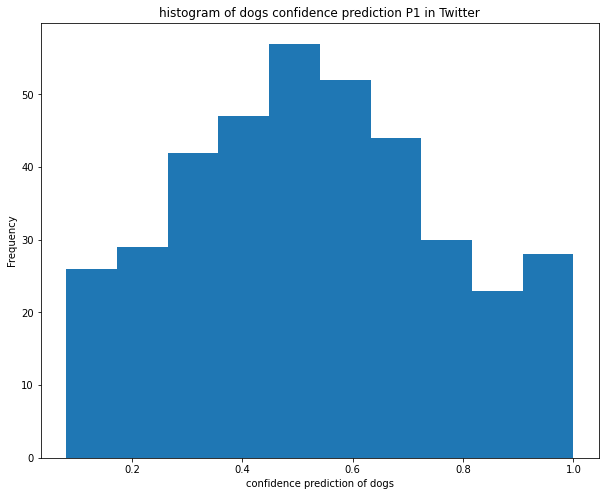

In [40]:
#visualization using histogram.
plt.figure(figsize=(10,8))
image_prediction.groupby(['p1', 'p1_dog'])['p1_conf'].mean().plot(kind = 'hist')
plt.xlabel('confidence prediction of dogs')
plt.title('histogram of dogs confidence prediction P1 in Twitter')


Text(0.5, 1.0, 'histogram of dogs confidence prediction P2 in Twitter')

<Figure size 720x576 with 0 Axes>

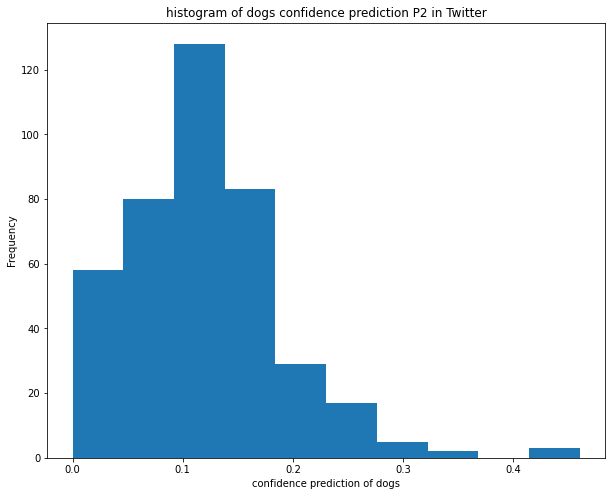

In [41]:
#grouping with confidence prediction with dog_breed and prediction for p2 with histogram. there is a outlier in p2
plt.figure(figsize=(10,8))
plt.figure(figsize=(10,8))
image_prediction.groupby(['p2', 'p2_dog'])['p2_conf'].mean().plot(kind = 'hist')
plt.xlabel('confidence prediction of dogs')
plt.title('histogram of dogs confidence prediction P2 in Twitter')

Text(0.5, 1.0, 'histogram of dogs confidence prediction PP3 in Twitter')

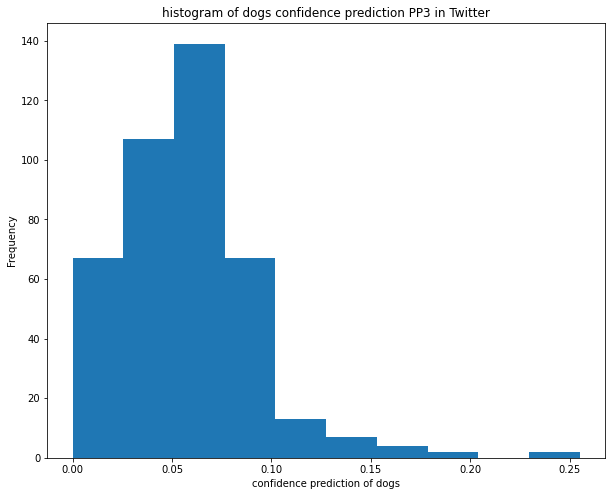

In [42]:
#grouping with confidence prediction with dog_breed and prediction for p3, there is a outlier in p3
plt.figure(figsize=(10,8))
image_prediction.groupby(['p3', 'p3_dog'])['p3_conf'].mean().plot(kind = 'hist')
plt.xlabel('confidence prediction of dogs')
plt.title('histogram of dogs confidence prediction PP3 in Twitter')

In the histogram plot of three diffrent prediction and alogorithm of p1, p2 and p3 shows that p1 prediction of dogs images are normally distributed and variations are equally distributed. The other two plots of p2 and p3 prediction of dogs' images are right skewed and they have outliers.



In [43]:
list(image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [44]:
#assessing with groupby of p1s
image_prediction.groupby(['p1', 'p1_dog'])['p1_conf'].value_counts().sample(100)

p1                  p1_dog  p1_conf 
toy_poodle          True    0.431080    1
kuvasz              True    0.311325    1
Siberian_husky      True    0.396495    1
Bedlington_terrier  True    0.286558    1
chow                True    0.316565    2
                                       ..
Eskimo_dog          True    0.466778    1
dalmatian           True    0.556595    2
teddy               False   0.569566    1
bath_towel          False   0.736759    1
dingo               False   0.310903    1
Name: p1_conf, Length: 100, dtype: int64

In [45]:
image_prediction['jpg_url'].value_counts()

https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg    2
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg    2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg    2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg    2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg    2
                                                  ..
https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg    1
https://pbs.twimg.com/media/CYkON6CVAAAPXAc.jpg    1
https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg    1
https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg    1
https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

## **Cleaning**

That data is very messy, untidy and dirty need to be clean.

In [46]:
#copying of original dataframe
tweet_enhance_clean = tweet_enhance.copy()
json_df_clean = json_df.copy()
image_prediction_clean = image_prediction.copy()

In [47]:
list(tweet_enhance_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [48]:
#where values are not none change them from float to int to str. so we can convert all these columns in standard form
for col in ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']:
  tweet_enhance_clean.loc[tweet_enhance_clean[col].notnull(), col] = tweet_enhance_clean.loc[tweet_enhance_clean[col].notnull(),col].apply(lambda x: str(int(float(x))))


In [49]:
#check the datatypes of these valeus to convert in object
tweet_enhance_clean.dtypes

tweet_id                       int64
in_reply_to_status_id         object
in_reply_to_user_id           object
timestamp                     object
source                        object
text                          object
retweeted_status_id           object
retweeted_status_user_id      object
retweeted_status_timestamp    object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

In [50]:
#check these columns if they are converted in standard form,can't use the head and tail function because most of the values are none.
tweet_enhance_clean.in_reply_to_status_id.value_counts()

667152164079423488    2
690341253549002752    1
856286004109553664    1
684222868335505408    1
797123751162839040    1
                     ..
670668383499735040    1
707980065892667392    1
692417313023332352    1
684959798585110528    1
674752233200820224    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [51]:
#converting datatime datatype
columns = ['timestamp', 'retweeted_status_timestamp']
for i in columns:
  tweet_enhance_clean[i] = pd.to_datetime(tweet_enhance_clean[i])
tweet_enhance_clean.dtypes 

tweet_id                                    int64
in_reply_to_status_id                      object
in_reply_to_user_id                        object
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                        object
retweeted_status_user_id                   object
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

In [52]:
#replacing none values from the doggo, pupper, puppo and floofer columns
tweet_enhance_clean.doggo.replace('None', '', inplace=True)
tweet_enhance_clean.pupper.replace('None', '', inplace=True)
tweet_enhance_clean.puppo.replace('None', '', inplace=True)
tweet_enhance_clean.floofer.replace('None', '', inplace=True)

In [53]:
#check if none values are replaced.
tweet_enhance_clean.head()

tweet_id in_reply_to_status_id  ... pupper puppo
0  892420643555336193                   NaN  ...             
1  892177421306343426                   NaN  ...             
2  891815181378084864                   NaN  ...             
3  891689557279858688                   NaN  ...             
4  891327558926688256                   NaN  ...             

[5 rows x 17 columns]

In [54]:
#Merge into one cloumn dog_stage
tweet_enhance_clean['dog_stage'] = tweet_enhance_clean.doggo + tweet_enhance_clean.floofer + tweet_enhance_clean.pupper + tweet_enhance_clean.puppo

In [55]:
#check the dog_stage column
tweet_enhance_clean.head(1)

tweet_id in_reply_to_status_id  ... puppo dog_stage
0  892420643555336193                   NaN  ...                

[1 rows x 18 columns]

In [56]:
#Handling multiple stages in dog_stage column
tweet_enhance_clean.loc[tweet_enhance_clean.dog_stage=='doggopupper', 'dog_stage'] = 'doggo, pupper'
tweet_enhance_clean.loc[tweet_enhance_clean.dog_stage=='doggopuppo', 'dog_stage'] = 'doggo, puppo'
tweet_enhance_clean.loc[tweet_enhance_clean.dog_stage=='doggofloofer', 'dog_stage'] = 'doggo, floofer'


In [57]:
tweet_enhance_clean.head()

tweet_id in_reply_to_status_id  ... puppo dog_stage
0  892420643555336193                   NaN  ...                
1  892177421306343426                   NaN  ...                
2  891815181378084864                   NaN  ...                
3  891689557279858688                   NaN  ...                
4  891327558926688256                   NaN  ...                

[5 rows x 18 columns]

In [58]:
#check the shape of melting dataset
tweet_enhance_clean.shape

(2356, 18)

In [59]:
#dealing with missing vlaues, we can see missing values are in empty str(''), converting these values to numpy's nan method.
tweet_enhance_clean.loc[tweet_enhance_clean.dog_stage=='', 'dog_stage'] = np.nan


In [60]:
#check the table if we are getting dog_stage values and none values
tweet_enhance_clean.sample(20)

tweet_id in_reply_to_status_id  ... puppo dog_stage
584   800141422401830912                   NaN  ...             NaN
1581  687124485711986689                   NaN  ...             NaN
352   831315979191906304                   NaN  ...          pupper
1466  694342028726001664                   NaN  ...             NaN
1782  677687604918272002                   NaN  ...             NaN
749   779124354206535695                   NaN  ...             NaN
2286  667182792070062081                   NaN  ...             NaN
480   815736392542261248                   NaN  ...             NaN
2211  668614819948453888                   NaN  ...             NaN
1482  693267061318012928                   NaN  ...             NaN
1855  675531475945709568                   NaN  ...             NaN
810   771380798096281600                   NaN  ...             NaN
1857  675517828909424640                   NaN  ...             NaN
353   831309418084069378                   NaN  ...             NaN
1303  707420581654872064                   NaN  ...             NaN
233   847842811428974592                   NaN  ...             NaN
371   828408677031882754                   NaN  ...             NaN
1017  746872823977771008                   NaN  ...             NaN
2326  666411507551481857                   NaN  ...             NaN
1873  675145476954566656                   NaN  ...             NaN

[20 rows x 18 columns]

In [61]:
#dropping these four columns
tweet_enhance_clean.drop(['doggo','pupper','puppo','floofer'], axis=1, inplace=True)
tweet_enhance_clean.head(1)

tweet_id in_reply_to_status_id  ...     name dog_stage
0  892420643555336193                   NaN  ...  Phineas       NaN

[1 rows x 14 columns]

In [62]:
all_columns = pd.Series(list(tweet_enhance_clean) + list(image_prediction_clean) + list(json_df))
all_columns[all_columns.duplicated()]

14    tweet_id
26    tweet_id
dtype: object

In [63]:
tweet_enhance_clean.shape, json_df.shape

((2356, 14), (2331, 3))

In [64]:
json_df.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2326    666049248165822465
2327    666044226329800704
2328    666033412701032449
2329    666029285002620928
2330    666020888022790149
Name: tweet_id, Length: 2331, dtype: int64

In [65]:
#joining tweet_enhance_clean and json_df_clean data
tweet_enhance_clean = pd.merge(left=tweet_enhance_clean, right=json_df, left_on='tweet_id', right_on='tweet_id')
tweet_enhance_clean.head()

tweet_id in_reply_to_status_id  ... favorite_count retweets
0  892420643555336193                   NaN  ...          35055     7372
1  892177421306343426                   NaN  ...          30357     5494
2  891815181378084864                   NaN  ...          22816     3631
3  891689557279858688                   NaN  ...          38335     7549
4  891327558926688256                   NaN  ...          36610     8136

[5 rows x 16 columns]

In [66]:
tweet_enhance_clean.shape

(2331, 16)

In [67]:
#extracting ratings from the text column
tweet_enhance_clean['ratings'] = tweet_enhance_clean.text.str.extract('([0-9]*\d\/\d\d)', expand=True)
tweet_enhance_clean.ratings

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2326     5/10
2327     6/10
2328     9/10
2329     7/10
2330     8/10
Name: ratings, Length: 2331, dtype: object

In [68]:
#tweet_enhance_clean.text.replace('\n', '.',  inplace=True)

In [69]:
tweet_enhance_clean['tweet_url'] = tweet_enhance_clean.text.str.extract('([https]+://[\w(\.|/)]+)', expand = True)
tweet_enhance_clean['tweet_url']

0       https://t.co/MgUWQ76dJU
1       https://t.co/0Xxu71qeIV
2       https://t.co/wUnZnhtVJB
3       https://t.co/tD36da7qLQ
4       https://t.co/AtUZn91f7f
                 ...           
2326    https://t.co/4B7cOc1EDq
2327    https://t.co/DWnyCjf2mx
2328    https://t.co/y671yMhoiR
2329    https://t.co/r7mOb2m0UI
2330    https://t.co/BLDqew2Ijj
Name: tweet_url, Length: 2331, dtype: object

In [70]:
tweet_enhance_clean.tweet_url.value_counts()

https://t.c                6
https://t                  6
https://t.co/              4
https://t.                 4
https://t.co/T7Jr4Gw4sC    2
                          ..
https://t.co/uT7QeZI34U    1
https://t.co/96IBkOYB7j    1
https://t.co/Zr4hWfAs1H    1
https://t.co/6RHNRsByOY    1
https://t.co/zeDpnsKX7w    1
Name: tweet_url, Length: 2143, dtype: int64

In [71]:
tweet_enhance_clean.expanded_urls.duplicated().sum()

129

In [72]:
#merging imag_prediction_clean table with tweet_enhance_clean
master_clean = pd.merge(left=tweet_enhance_clean, right=image_prediction_clean, left_on='tweet_id', right_on='tweet_id')
master_clean.head()


tweet_id in_reply_to_status_id  ...   p3_conf p3_dog
0  892420643555336193                   NaN  ...  0.076110  False
1  892177421306343426                   NaN  ...  0.068957   True
2  891815181378084864                   NaN  ...  0.031379   True
3  891689557279858688                   NaN  ...  0.040836  False
4  891327558926688256                   NaN  ...  0.175219   True

[5 rows x 29 columns]

In [73]:

#Extracting dog_name from the text column
text_dog_name = []
for text in master_clean.text:
  name_search = re.search('([Tt]his is\s\w+)', text) or re.search('([Mm]eet\s\w+)', text)
  if name_search:
    # split the string and choosing last word
    name = name_search.group().split()[-1]
    text_dog_name.append(name)
    
text_dog_name

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'Elliot',
 'Louis',
 'Bella',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Jed',
 'Sebastian',
 'Sierra',
 'Monkey',
 'Kody',
 'Rover',
 'Napolean',
 'Boomer',
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 'Walter',
 'Harold',
 'Shikha',
 'Lili',
 'Jamesy',
 'Coco',
 'Boomer',
 'Sammy',
 'Nelly',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 'Belle',
 'Zooey',
 'Dave',


In [74]:
#adding text_dog_name column in master_clean data frame
master_clean['text_dog_name'] = pd.Series(text_dog_name)
master_clean.head(1)

tweet_id in_reply_to_status_id  ... p3_dog text_dog_name
0  892420643555336193                   NaN  ...  False       Phineas

[1 rows x 30 columns]

In [75]:
#We exracted url, dog_name and ratings from the text column, now we can drop that column.
master_clean.drop('text', axis=1, inplace=True)
master_clean.head(1)

tweet_id in_reply_to_status_id  ... p3_dog text_dog_name
0  892420643555336193                   NaN  ...  False       Phineas

[1 rows x 29 columns]

In [76]:
master_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/670385711116361728/photo/1                                                                    1
https://twitter.com/dog_rates/status/684195085588783105/photo/1                                                                    1
https://twitter.com/dog_rates/status/699691744225525762/photo/1                                                                    1
https://twitter.com/dog_rates/status/687476254459715584/photo/1                                                                    1
https://twitter.com/dog_rates/status/695629776980148225/photo/1,https://twitter.com/dog_rates/status/695629776980148225/photo/1    1
                                                                                                                                  ..
https://twitter.com/dog_rates/status/690932576555528194/photo/1                                                                    1
https://twitter.com/dog_rates/status/670840546554966016/photo/1      

In [77]:
#use mask function to avoid lowercase, single letter with lowercase.
mask = master_clean.name.str.islower()
column_name = 'name'
master_clean.loc[mask, column_name]=np.nan
   

In [78]:
#Replacing None values to np.nan
master_clean.name.replace('None', np.nan, inplace=True)

In [79]:
#renaming column name, name to dog_name
master_clean.rename(columns={'name':'dog_name'}, inplace = True)

In [80]:
#check the name column, to see all none values are converted to np.nan
master_clean.dog_name.sample(10)

664       Gerald
336          NaN
249      Bentley
68         Penny
596      Strider
1664      Jeffri
1          Tilly
1167       Miley
1155         NaN
880     Storkson
Name: dog_name, dtype: object

In [81]:
def remove_char(column):
  if isinstance(column, str):
    return column.replace('_', ' ').replace('-', ' ')
  else:
    return np.nan
master_clean['dog_name'] = master_clean.dog_name.apply(remove_char)

In [82]:
master_clean.dog_name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [83]:
#getting all true dog_breeds that's actual belong to dog_breeds
def pred_breed(row):
  if row.p1_dog == True:
    return row.p1
  elif row.p2_dog == True:
    return row.p2
  elif row.p3_dog == True:
    return row.p3
master_clean['dog_breed'] = master_clean.apply(lambda row: pred_breed(row), axis = 1)

In [84]:
#checking all false dog_breeds name that don't belong to actual dog_breeds
def false_pred(row):
  if row.p1_dog == False:
    return row.p1
  elif row.p2_dog == False:
    return row.p2
  elif row.p3_dog == False:
    return row.p3
master_clean['dog_breed_false'] = master_clean.apply(lambda row: false_pred(row), axis = 1)
  

In [85]:
master_clean.dog_breed_false.sample(50)

963              None
1787             None
695           gondola
1841        boathouse
1480             None
1205             None
659         mousetrap
1300             None
1755      hermit_crab
162              None
412              None
1240             None
745        bath_towel
965              None
2024        chain_saw
29         shower_cap
35               None
632              None
1533           Loafer
1776             None
197       tennis_ball
1940       Arctic_fox
621              None
1252          bow_tie
898              None
1123     sleeping_bag
1337        damselfly
340              None
234      wooden_spoon
471             dough
852           balloon
1886             None
1283             None
1353            llama
1076             None
719              None
1986             None
1493             None
423              None
770              None
1194             None
226         seat_belt
1274    motor_scooter
175            bonnet
30               None
46        

all these false_dog_breeds not belong to dog's breed.

In [86]:
#dropping false dog_breed
master_clean.drop('dog_breed_false', axis=1, inplace=True)
master_clean.head(1)

tweet_id in_reply_to_status_id  ... text_dog_name dog_breed
0  892420643555336193                   NaN  ...       Phineas      None

[1 rows x 30 columns]

In [87]:
#now we can drop p1,p2 and p3 because we got dog breed from these columns.
master_clean.drop(['p1','p2','p3'], axis=1, inplace = True)
master_clean.head(1)

tweet_id in_reply_to_status_id  ... text_dog_name dog_breed
0  892420643555336193                   NaN  ...       Phineas      None

[1 rows x 27 columns]

In [88]:
#removing null values from the retweet columns
master_clean = master_clean[master_clean.retweeted_status_id.isnull()]
master_clean = master_clean[master_clean.retweeted_status_user_id.isnull()]
master_clean = master_clean[master_clean.retweeted_status_timestamp.isnull()]

In [89]:
master_clean = master_clean[master_clean['in_reply_to_status_id'].isnull()==True]
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1964 non-null   int64              
 1   in_reply_to_status_id       0 non-null      object             
 2   in_reply_to_user_id         0 non-null      object             
 3   timestamp                   1964 non-null   datetime64[ns, UTC]
 4   source                      1964 non-null   object             
 5   retweeted_status_id         0 non-null      object             
 6   retweeted_status_user_id    0 non-null      object             
 7   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 8   expanded_urls               1964 non-null   object             
 9   rating_numerator            1964 non-null   int64              
 10  rating_denominator          1964 non-null   int64           

In [90]:
#dropping retweet columns
master_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)
master_clean.head(1)

tweet_id                 timestamp  ... text_dog_name dog_breed
0  892420643555336193 2017-08-01 16:23:56+00:00  ...       Phineas      None

[1 rows x 22 columns]

In [91]:
#converting tweet_id to str
master_clean['tweet_id'] = master_clean.tweet_id.astype(str)
master_clean.tweet_id.dtype

dtype('O')

In [92]:
master_clean#proportion of ratings
master_clean['proportion_of_ratings'] = master_clean['rating_numerator']/master_clean['rating_denominator']
master_clean['proportion_of_ratings']
master_clean.head(1)

tweet_id  ... proportion_of_ratings
0  892420643555336193  ...                   1.3

[1 rows x 23 columns]

In [93]:
master_clean['proportion_of_ratings'].value_counts()

1.200000      448
1.000000      418
1.100000      397
1.300000      249
0.900000      150
0.800000       95
0.700000       51
0.500000       34
1.400000       33
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.600000        1
177.600000      1
3.428571        1
0.636364        1
0.818182        1
42.000000       1
7.500000        1
0.000000        1
2.700000        1
Name: proportion_of_ratings, dtype: int64

In [94]:
master_clean.query('proportion_of_ratings == 0.000000')

tweet_id  ... proportion_of_ratings
241  835152434251116546  ...                   0.0

[1 rows x 23 columns]

In [95]:
#dropping 0 values from the proportion of  ratings
master_clean.drop(241, axis=0, inplace=True)

In [96]:
master_clean.query('proportion_of_ratings == 0.000000')

Empty DataFrame
Columns: [tweet_id, timestamp, source, expanded_urls, rating_numerator, rating_denominator, dog_name, dog_stage, favorite_count, retweets, ratings, tweet_url, jpg_url, img_num, p1_conf, p1_dog, p2_conf, p2_dog, p3_conf, p3_dog, text_dog_name, dog_breed, proportion_of_ratings]
Index: []

In [97]:
#now we can drop rating_denominator and rating numerator, rating proportion will be use for analysis.
master_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)
master_clean.head(1)

tweet_id  ... proportion_of_ratings
0  892420643555336193  ...                   1.3

[1 rows x 21 columns]

In [98]:
#saving clean file to csv
master_clean.to_csv('twitter_archive_master.csv', index=False)

In [99]:
#check the file
save_file = pd.read_csv('twitter_archive_master.csv')
save_file.head(1)

tweet_id  ... proportion_of_ratings
0  892420643555336193  ...                   1.3

[1 rows x 21 columns]

# Analysis

In [100]:
master_clean.head(2)

tweet_id  ... proportion_of_ratings
0  892420643555336193  ...                   1.3
1  892177421306343426  ...                   1.3

[2 rows x 21 columns]

In [101]:
#using p1 prediction of dogs they prdicted correctly.configration mean of dog prediction.
master_clean['p1_conf'].mean(), master_clean['p2_conf'].mean(), master_clean['p3_conf'].mean()

(0.5937383533367298, 0.13470142035461685, 0.06031648764522214)

In [102]:
#getting average of true prediction of p1, p2 and p3
master_clean.query('p1_dog == True')['p1_conf'].mean(), master_clean.query('p2_dog == True')['p2_conf'].mean(), master_clean.query('p3_dog == True')['p3_conf'].mean()

(0.6142926478021982, 0.14037784092601924, 0.06144809294977514)

Correctly dog prediction of p1,p2 and p3 are 61%, 14% and 6%. We can say p1 dog prediction is more correctly defined than p2 and p3.

In [103]:
#now we can find average false prediction of p1, p2 and p3
master_clean.query('p1_dog == False')['p1_conf'].mean(), master_clean.query('p2_dog == False')['p2_conf'].mean(), master_clean.query('p3_dog == False')['p3_conf'].mean()

(0.5347106358974354, 0.11768371957843794, 0.05733449811118707)

Wrong prediction of p1, p2 and p3 are 54%, 11% and 5%, that false prediction is preety close to true prediction, more false prediction is in p1 than p2 and p3. 

Text(0.5, 0, 'Mean prediction of dogs')

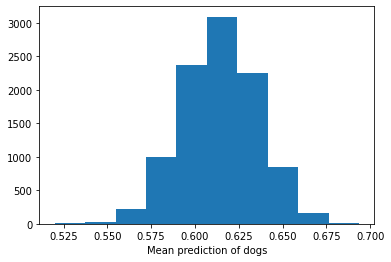

In [104]:
#using bootstrap smapling of True prediction.
p1_sample = []
for _ in range(10000):
  sample = master_clean.sample(200, replace=True)
  p1_mean = sample.query('p1_dog==True')['p1_conf'].mean()
  p1_sample.append(p1_mean)
plt.hist(p1_sample)
plt.xlabel('Mean prediction of dogs')



In [105]:
#building confidence interval of 95% from the p1_sample
np.percentile(p1_sample, 2.5), np.percentile(p1_sample, 97.5)

(0.571638654544183, 0.6553959250000001)

The mean prediction of all p1_dog in the population to be with 95% confidence between 57% and 65% correct prediction compare with actual mean.

Text(0.5, 0, 'False Mean prediction of dogs')

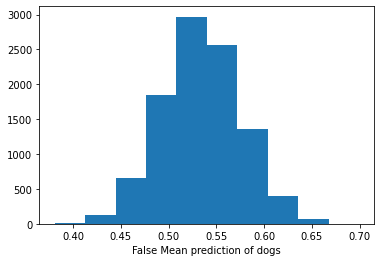

In [106]:
p1_false_sample = []
for _ in range(10000):
  sample = master_clean.sample(200, replace=True)
  p1_mean = sample.query('p1_dog==False')['p1_conf'].mean()
  p1_false_sample.append(p1_mean)
plt.hist(p1_false_sample)
plt.xlabel('False Mean prediction of dogs')

In [107]:
np.percentile(p1_false_sample, 2.5), np.percentile(p1_false_sample, 97.5)

(0.45385753584001776, 0.6156281917083333)

Confidence interval of false prediction is identical of confidence interval of true prediction, uncertainty of dog prediction falls between 46% and 62%.

Text(0.5, 0, 'Mean prediction of dogs')

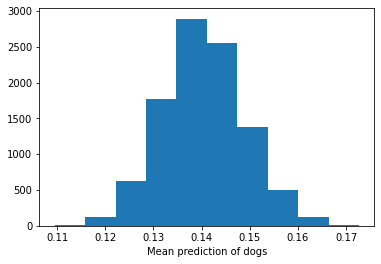

In [108]:
#using bootstrap smapling of True prediction.
p2_sample = []
for _ in range(10000):
  sample = master_clean.sample(200, replace=True)
  p2_mean = sample.query('p2_dog==True')['p2_conf'].mean()
  p2_sample.append(p2_mean)
plt.hist(p2_sample)
plt.xlabel('Mean prediction of dogs')


In [109]:
#building confidence interval of 95% from the p2_sample
np.percentile(p2_sample, 2.5), np.percentile(p2_sample, 97.5)

(0.12371396449728791, 0.15760183561640073)

The mean prediction of all p2_dog in the population to be with 95% confidence between 12% and 15% correct prediction compare with actual mean.

Text(0.5, 0, 'Mean prediction of dogs')

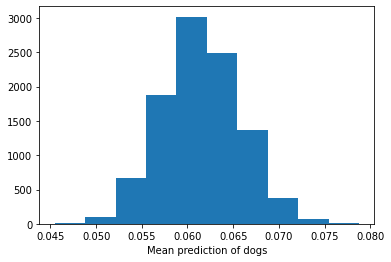

In [110]:
#using bootstrap smapling of True prediction.
p3_sample = []
for _ in range(10000):
  sample = master_clean.sample(200, replace=True)
  p3_mean = sample.query('p3_dog==True')['p3_conf'].mean()
  p3_sample.append(p3_mean)
plt.hist(p3_sample)
plt.xlabel('Mean prediction of dogs')


In [111]:
np.percentile(p3_sample, 2.5), np.percentile(p3_sample, 97.5)

(0.0532952768191521, 0.0700770740919675)

The mean prediction of all p3_dog in the population to be with 95% confidence between 5% and 7% correct prediction compare with actual mean.

(array([3.000e+00, 2.100e+01, 1.420e+02, 7.010e+02, 2.090e+03, 3.166e+03,
        2.514e+03, 1.106e+03, 2.320e+02, 2.500e+01]),
 array([-0.13488875, -0.09693272, -0.05897669, -0.02102066,  0.01693537,
         0.0548914 ,  0.09284743,  0.13080346,  0.16875949,  0.20671551,
         0.24467154]),
 <a list of 10 Patch objects>)

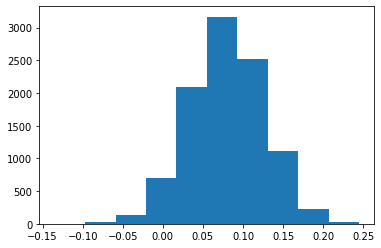

In [112]:
#diffrence in prediction mean correct/wrong prediction
diff_mean = []
for _ in range(10000):
    bootsamp = master_clean.sample(200,replace = True)
    mean_true = bootsamp[bootsamp['p1_dog']==True]['p1_conf'].mean()
    mean_false = bootsamp[bootsamp['p1_dog']==False]['p1_conf'].mean()
    diff_mean.append(mean_true - mean_false)
plt.hist(diff_mean)

In [113]:
np.percentile(diff_mean, 2.5), np.percentile(diff_mean, 97.5)

(-0.013383257963514774, 0.16931186446234092)

In [114]:
#population diff in mean
master_clean.query('p1_dog == True')['p1_conf'].mean() - master_clean.query('p1_dog == False')['p1_conf'].mean()

0.07958201190476277


our confidence level of chosing dog breed average prediction of True and False are between -.012 and 0.16, and actual diffrence of mean of True and False is .078,  

In [115]:
master_clean.proportion_of_ratings.mean()

1.169884420215544

Average proportion rating is 1.17 that means most of the dogs got good ratings, that falls between 0.9 to 1

In [116]:
master_clean.proportion_of_ratings.std()

4.098874168696013

In [117]:
master_clean.proportion_of_ratings.var()

16.800769450803433

In [118]:
#most tweeted breed dog
group1 = master_clean.groupby('dog_breed')['retweets'].mean().sort_values(ascending=False)
group1

dog_breed
Bedlington_terrier    7020.166667
Afghan_hound          5006.666667
standard_poodle       4690.727273
French_bulldog        4617.333333
English_springer      4602.900000
                         ...     
EntleBucher            588.000000
Tibetan_terrier        466.500000
Japanese_spaniel       381.000000
Brabancon_griffon      243.666667
groenendael            234.500000
Name: retweets, Length: 113, dtype: float64

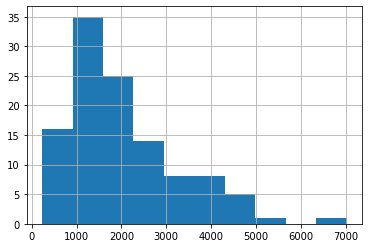

In [119]:
#we can see ffrom the histogram that only Bedlington_terrier got highest retweets.
group1.hist()

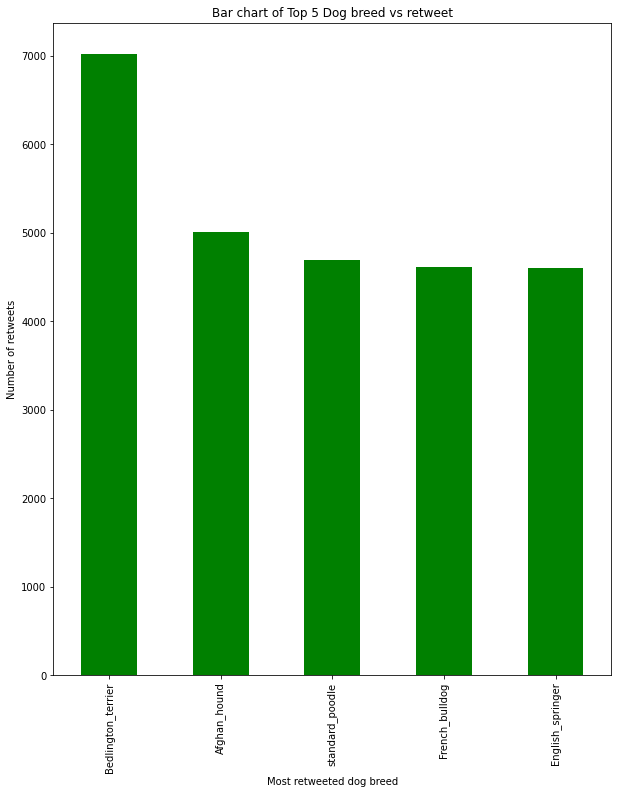

In [120]:
#top 5 most retweeted dog breed
plt.figure(figsize=(10,12))
group1.iloc[:5].plot(kind = 'bar', color = 'g')
plt.xlabel('Most retweeted dog breed')
plt.ylabel('Number of retweets')
plt.title('Bar chart of Top 5 Dog breed vs retweet')
plt.show()


In [121]:
#finding which dog_breed and dog_stage got most retweets
group2 = master_clean.groupby(['dog_breed', 'dog_stage'])['retweets'].mean().sort_values(ascending = False)
group2


dog_breed                    dog_stage   
Eskimo_dog                   doggo           55448.0
Lakeland_terrier             puppo           41948.0
standard_poodle              doggo           36109.0
Rottweiler                   puppo           17092.0
flat-coated_retriever        doggo, puppo    16780.0
                                              ...   
whippet                      pupper            360.0
German_short-haired_pointer  pupper            359.0
boxer                        pupper            344.5
Brabancon_griffon            pupper            333.0
bull_mastiff                 pupper            217.0
Name: retweets, Length: 123, dtype: float64

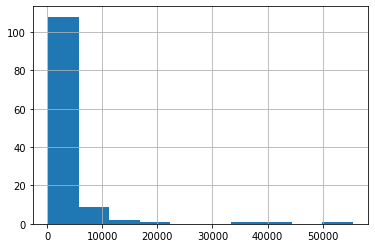

In [122]:
#doggo has highest retweets, pupper have less retweets
group2.hist()

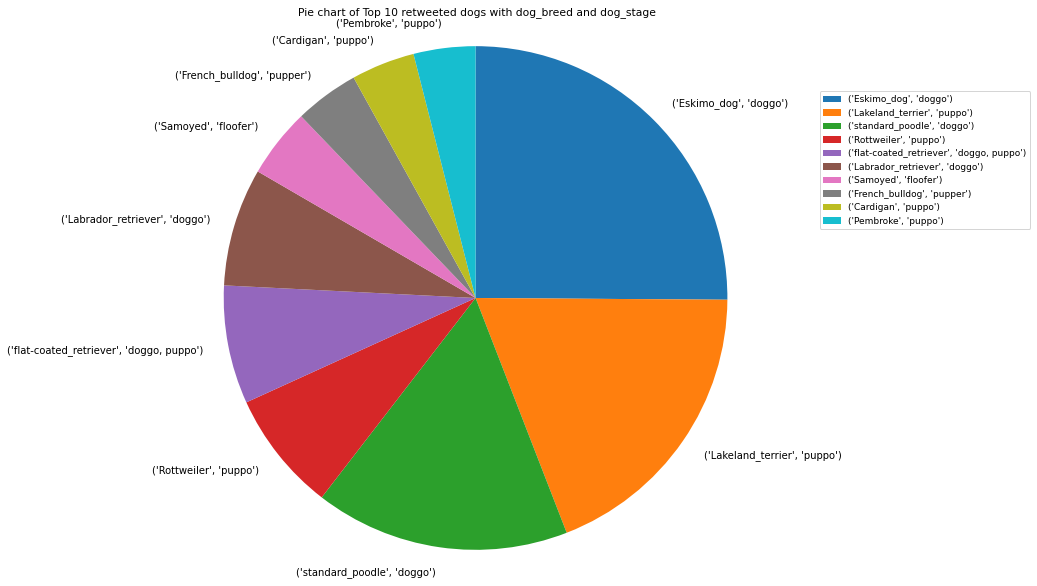

In [123]:
#top 10 retweeted dog_breed and dog_stage
plt.figure(figsize=(10,12))
group2 = group2.iloc[:10]
plt.pie(group2,labels = group2.index, startangle=90, counterclock=False)
plt.axis('square')
plt.rcParams['font.size'] = 9.0
plt.legend(group2.index, loc = 'right', bbox_to_anchor=(1, .5, .5, .5))
plt.title('Pie chart of Top 10 retweeted dogs with dog_breed and dog_stage')
plt.show()

In [124]:
group3 = master_clean.groupby(['dog_breed', 'ratings'])['favorite_count'].mean().sort_values(ascending = False)
group3

dog_breed                ratings
English_springer         13/10      96253.0
standard_poodle          14/10      85616.0
Bedlington_terrier       12/10      76488.0
Lakeland_terrier         13/10      73774.0
Pomeranian               13/10      59033.0
                                     ...   
Lhasa                    8/10         139.0
Gordon_setter            9/10         134.0
toy_terrier              10/10        110.0
pug                      6/10         101.0
black-and-tan_coonhound  7/10          98.0
Name: favorite_count, Length: 526, dtype: float64

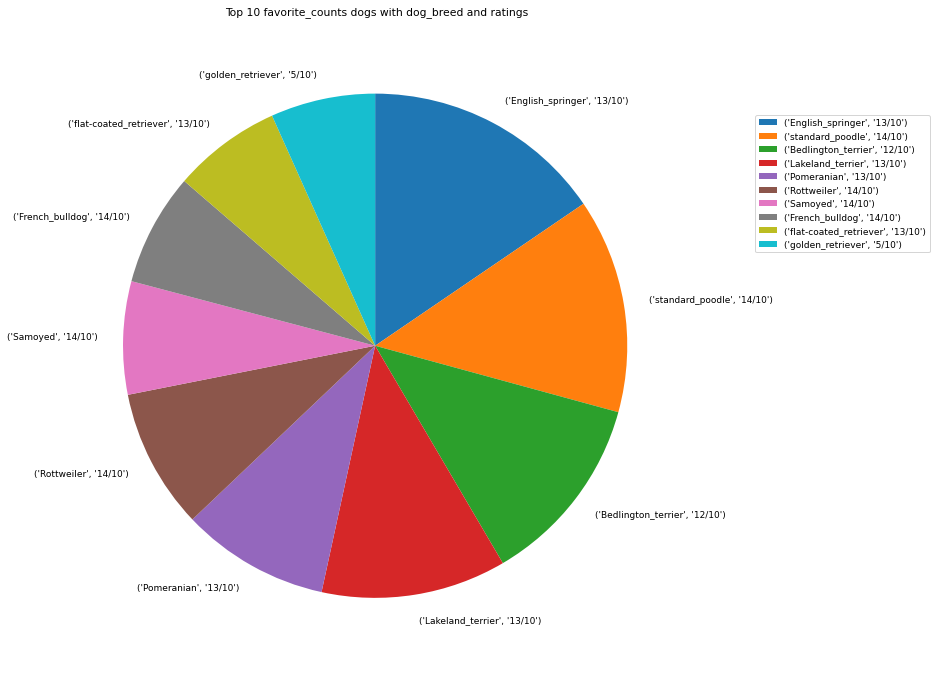

In [125]:
group3 = group3.iloc[:10]
plt.figure(figsize=(10,12))
plt.pie(group3,labels = group3.index, startangle=90, counterclock=False)
plt.axis('equal')
plt.rcParams['font.size'] = 9.0
plt.legend(group3.index, loc = 'right', bbox_to_anchor=(1, .5, .5, .5))
plt.title('Top 10 favorite_counts dogs with dog_breed and ratings')
plt.show()

In [126]:
#most rated dogbreed from the users.
group4 = master_clean.groupby(['jpg_url', 'dog_breed'])['proportion_of_ratings'].median().sort_values(ascending = False)
group4

jpg_url                                          dog_breed         
https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg  Pomeranian            7.500000
https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg  golden_retriever      3.428571
https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg  clumber               2.700000
https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg  kuvasz                2.600000
https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg  bloodhound            1.400000
                                                                         ...   
https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg  pug                   0.300000
https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg  Chihuahua             0.300000
https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg  Great_Dane            0.200000
https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg  miniature_pinscher    0.200000
https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg  Maltese_dog           0.200000
Name: proportion_of_ratings, Length: 1658, dtype: fl

Top rated is Pomeranin dog breed that has 7.5 ratings. Many user users gave him/her that much tweets and ratings. While golden_retriever got 3.4 ratings and less tweet than Pomeranian. Here is the image of these two  dog_breed. 

In [127]:
#Pomeranian dog_breed image display
url = 'https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg'
IFrame(url, width=900, height=500)


In [128]:
#Golden Retriver dog image
IFrame('https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg', width=1000, height=900)


Golden retriver dog got 3.4 ratings, that's second highest ratings in the jpg_urls.
Funny cute dog closing his eyse, must be playing with his family.

In [129]:
#least rated dogbreed has proportion rating is 0.2000, There are couple of dogs got that ratings
IFrame('https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg', width=1000, height=900)


It's so cute dog why he/she got less ratings, well try ratings from the text, see his ratings.

In [130]:
master_clean.query('jpg_url == "https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg"')
#His proportion_of)ratings(0.2) and ratings(2/10) are same.

tweet_id  ... proportion_of_ratings
1485  678424312106393600  ...                   0.2

[1 rows x 21 columns]

In [131]:
group5 = master_clean.groupby(['jpg_url', 'ratings'])['favorite_count'].max().sort_values(ascending = False)
group5

jpg_url                                                                                  ratings
https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg  13/10      150760
https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg                                          13/10      128915
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg  13/10      116426
https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg                                          13/10      112865
https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg  13/10      111494
                                                                                                     ...  
https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg                                          7/10           98
https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg                                          9/10           94
https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg

In [132]:
IFrame('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg', width = 1000, height = 900)

That's golden_retriver his favorit_count is 150760, and ratings 1.3.

In [133]:
# which dog got good ratings find out with their name
group6 = master_clean.groupby(['dog_name', 'dog_breed', 'ratings'])['proportion_of_ratings'].max().sort_values(ascending = False)
group6

dog_name      dog_breed           ratings
Logan         Pomeranian          75/10      7.5
Sophie        clumber             27/10      2.7
Bo            standard_poodle     14/10      1.4
Walter        French_bulldog      14/10      1.4
Ollie         golden_retriever    14/10      1.4
                                            ... 
Wesley        Afghan_hound        3/10       0.3
Alexanderson  Chihuahua           3/10       0.3
Bernie        pug                 3/10       0.3
Tedrick       miniature_pinscher  2/10       0.2
Crystal       Maltese_dog         2/10       0.2
Name: proportion_of_ratings, Length: 1171, dtype: float64

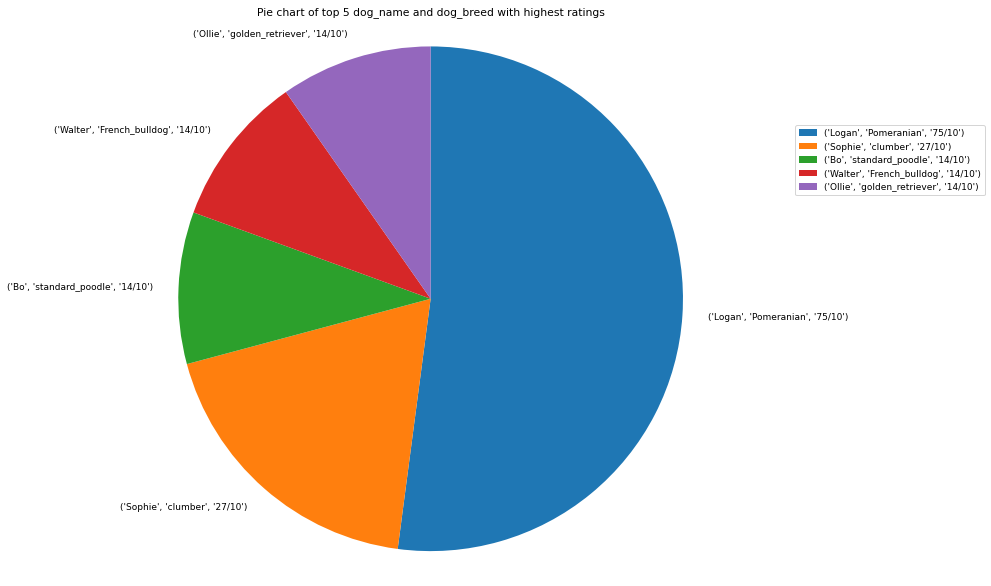

In [134]:
group6 = group6.iloc[:5]
plt.figure(figsize=(10,12))
plt.pie(group6, labels=group6.index, startangle=90, counterclock=False)
plt.title('Pie chart of top 5 dog_name and dog_breed with highest ratings')
plt.rcParams['font.size'] = 9.0
plt.legend(loc = 'right', bbox_to_anchor = [1,.5,.5,.5])
plt.axis('square')
plt.show()

Highest rating dog Pomeranin and his rating is 7.5 and most popular name for that dog is Logan and gold, French_bulldog, golden_retriver, and standard_poodle have same ratings which is 1.4, and there popular names are Walter, Ollie and Bo. while clumber has 2.7 ratings with Sophie name.